In [1]:
## Connect to gg driver
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/AI Tutor/CV/Topic2: Object Classification/day06

/content/drive/.shortcut-targets-by-id/1g_hBCGxmI5lTFXyvD-igJcroxCjDzObt/AI Tutor/CV/Topic2: Object Classification/day06


In [1]:
from function.pytorch.utils import load_data, visualize_confusionmatrix
from function.pytorch.eval import eval_torch
import torch

from sklearn.metrics import classification_report
class Config:
    def __init__(self):
        # Định nghĩa các thuộc tính cấu hình
        self.path_model = "models/torch/resnet18.pth"
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'  # Thiết bị sử dụng (cuda hoặc cpu)
        self.path_data = "../../dataset/test"  # Đường dẫn đến dữ liệu
        self.batch_size = 64 #Batch_size
        self.data = load_data(self.path_data)
        self.class_name = self.data.classes

In [2]:
cfg = Config()

## Model resnet18

In [3]:
cfg.path_model = 'models/torch/resnet18.pth'
# Load model and evaluation
model = torch.load(cfg.path_model)
true_labels, predictions = eval_torch(model, cfg)
print(classification_report(true_labels, predictions, target_names=cfg.class_name))

val: 100%|██████████| 49/49 [00:34<00:00,  1.43it/s]

              precision    recall  f1-score   support

   buildings       0.89      0.95      0.92       437
      forest       0.97      1.00      0.98       474
     glacier       0.89      0.89      0.89       553
    mountain       0.93      0.87      0.90       640
         sea       0.93      0.98      0.96       510
      street       0.96      0.89      0.93       501

    accuracy                           0.93      3115
   macro avg       0.93      0.93      0.93      3115
weighted avg       0.93      0.93      0.93      3115



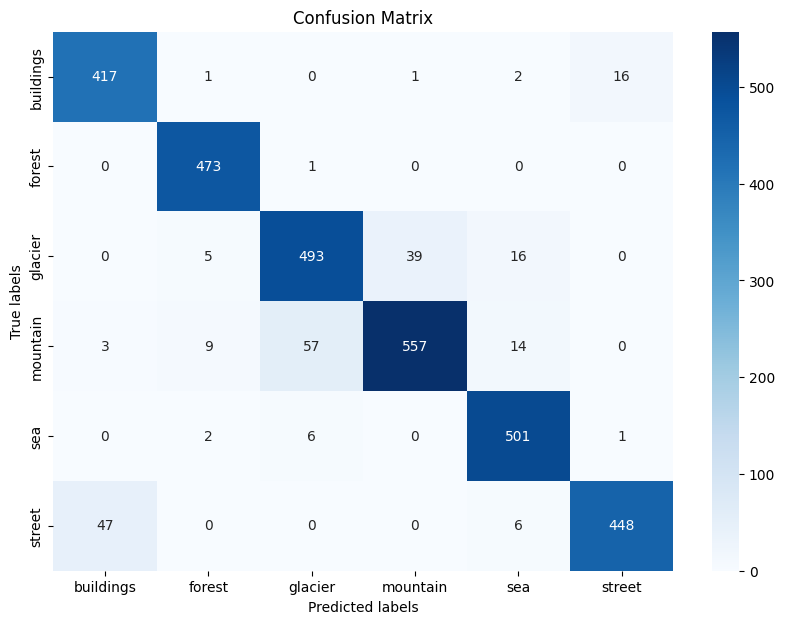

In [4]:
visualize_confusionmatrix(
    true_labels=true_labels,
    predictions=predictions,
    classes_name=cfg.class_name
)

## Model vgg19

In [5]:
cfg.path_model = 'models/torch/vgg19.pth'
# Load model and evaluation
model = torch.load(cfg.path_model)
true_labels, predictions = eval_torch(model, cfg)
print(classification_report(true_labels, predictions, target_names=cfg.class_name))

val: 100%|██████████| 49/49 [01:22<00:00,  1.67s/it]

              precision    recall  f1-score   support

   buildings       0.94      0.89      0.91       437
      forest       0.99      0.99      0.99       474
     glacier       0.86      0.88      0.87       553
    mountain       0.90      0.88      0.89       640
         sea       0.96      0.95      0.96       510
      street       0.91      0.96      0.93       501

    accuracy                           0.92      3115
   macro avg       0.93      0.92      0.93      3115
weighted avg       0.92      0.92      0.92      3115



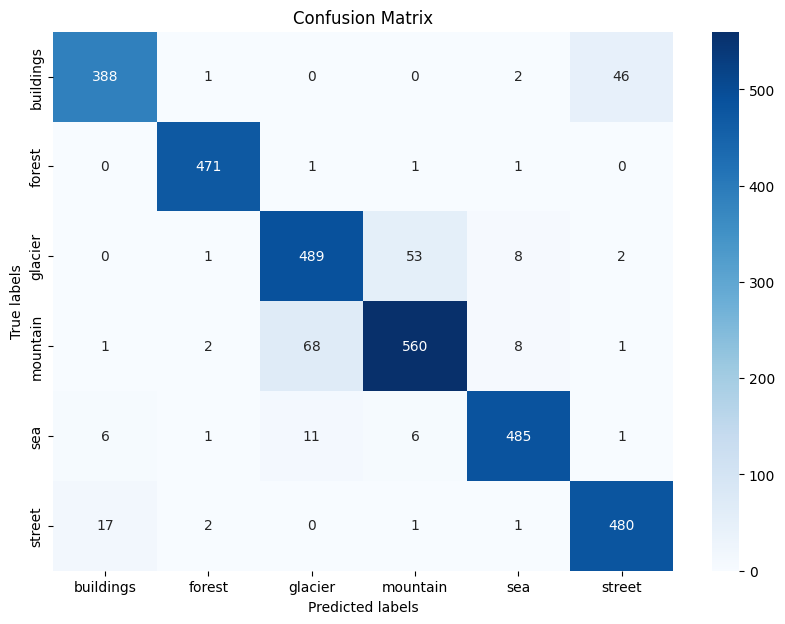

In [6]:
visualize_confusionmatrix(
    true_labels=true_labels,
    predictions=predictions,
    classes_name=cfg.class_name
)